<a href="https://colab.research.google.com/github/tjbingamon/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction of Product Sales
 Thomas Bingamon


## Project Overview

## Load and Inspect Data

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Import Libraries

In [ ]:
#Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

#Numpy
import numpy as np

#Seaborn
import seaborn as sns

#Warnings
import warnings
warnings.filterwarnings('ignore')

#Filepath
filename = ('/content/drive/MyDrive/Homework Stuff/sales_predictions.xlsx')

# Data Dictionary

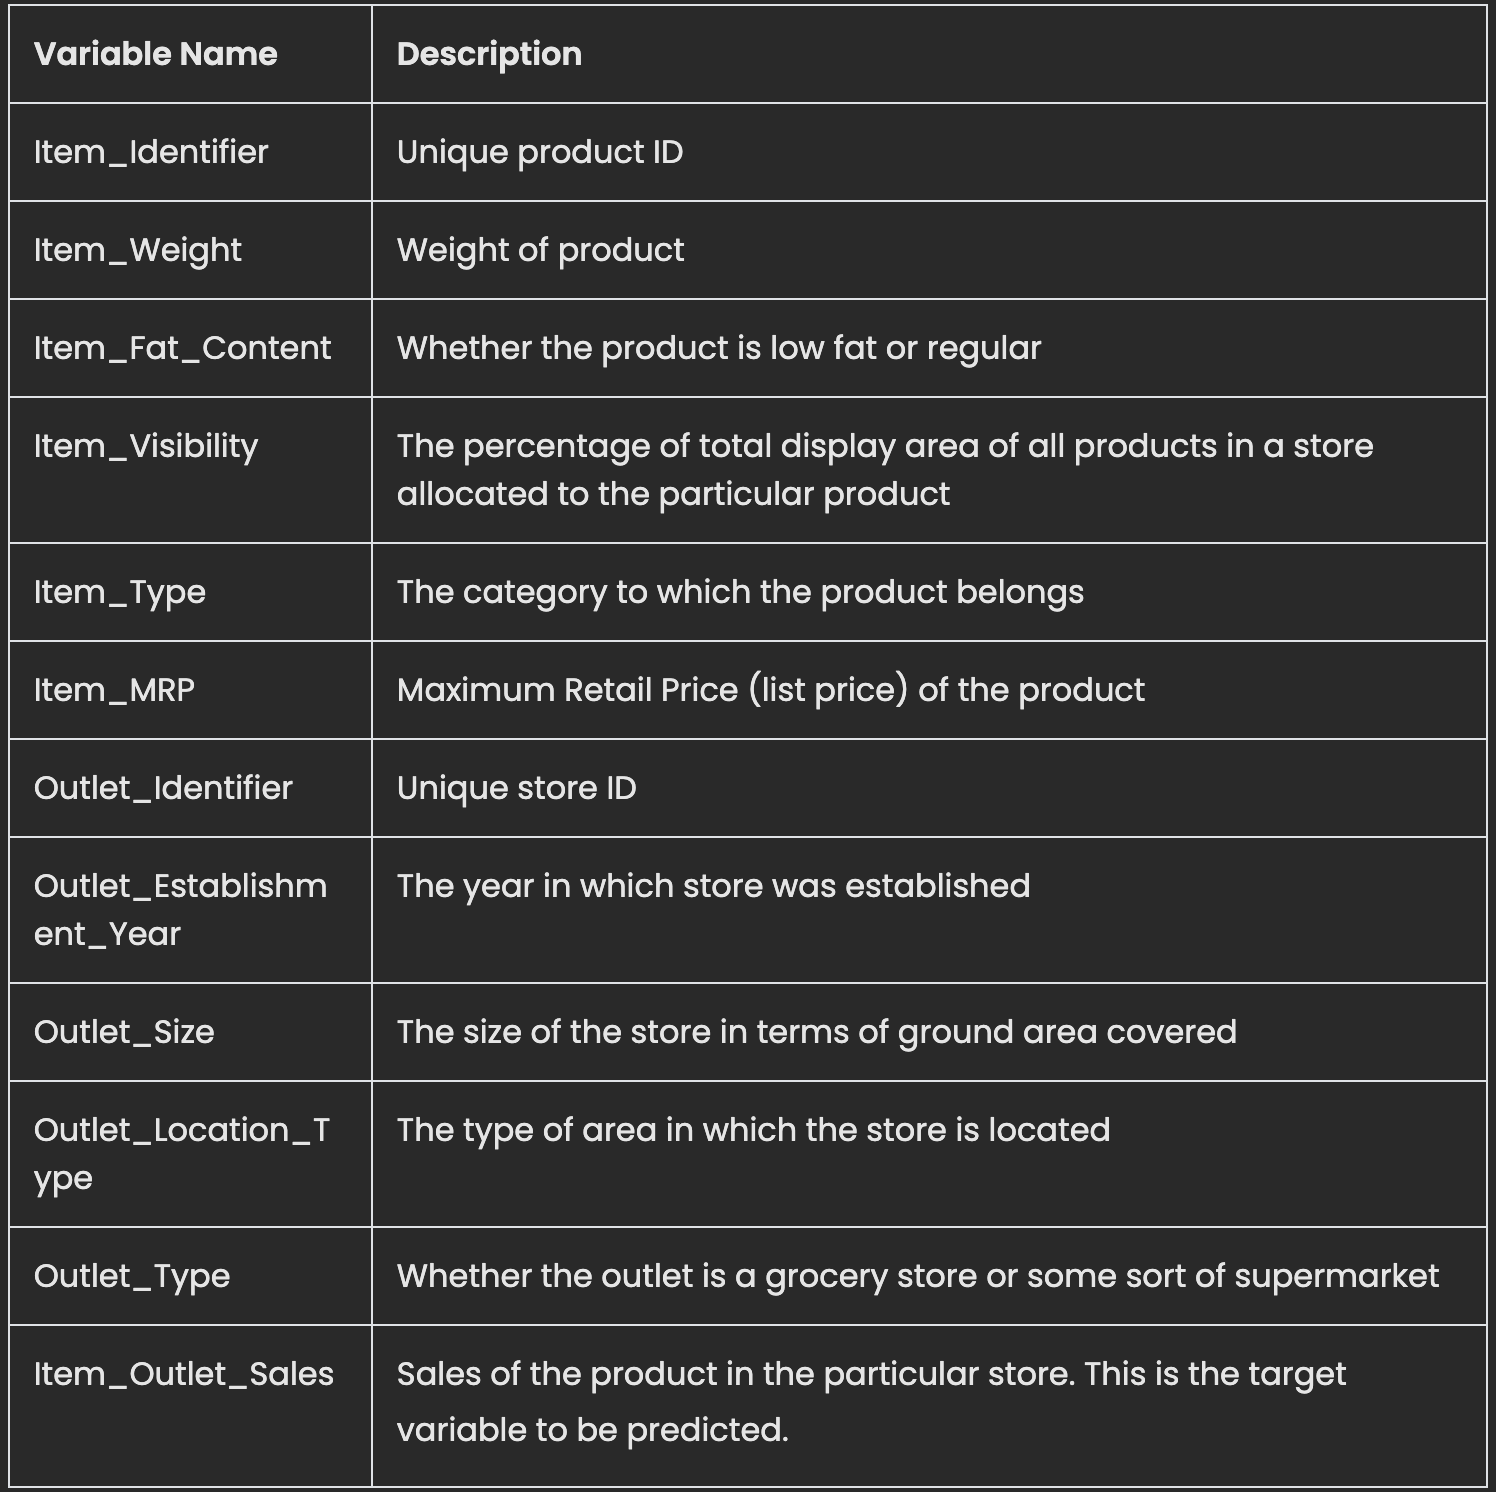

- Display head of data frame

In [ ]:
# Display the first (5) rows of the dataframe
product_df = pd.read_excel(filename)
product_df
# Display the column names, count of non-null values, and their datatypes
product_df.info()
product_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

1. How many rows and columns?

In [ ]:
# Display the number of rows and columns for the dataframe
product_df.shape
print(f'There are {product_df.shape[0]} rows, and {product_df.shape[1]} columns.')
print(f'The rows represent {product_df.shape[0]} observations, and the columns represent {product_df.shape[1]-1} features and 1 target variable.')

There are 8523 rows, and 12 columns.
The rows represent 8523 observations, and the columns represent 11 features and 1 target variable.


2. What are the datatypes of each variable?




In [ ]:
# Display the dataypes of each column
product_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3. Are there duplicates? If so, drop any duplicates.

In [ ]:
# Check for duplicated rows
product_df.duplicated().sum()

0

4. Identify missing values.

In [ ]:
# Check for missing values
product_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

- Add a justification for method chosen in a text cell for each column addressed.

In [ ]:
median_weight = product_df['Item_Weight'].median()
product_df['Item_Weight'].fillna(median_weight, inplace=True)
product_df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Justification: There are not enough missing values to justify dropping the column as too much data would be lost.

In [ ]:
product_df['Outlet_Size'].fillna('Unknown', inplace=True)

Justification: There are not enough missing values to justify dropping the column as too much data would be lost.

6. Confirm that there are no missing values after addressing them.

In [ ]:
product_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7.  Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).


In [ ]:
# Identify Object Data Types
data_types = product_df.dtypes
object_data_types = data_types[(data_types == "object")]
object_data_types

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [ ]:
object_data_types.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
#Examine unique objects in columns
for column in object_data_types.index:
    print(column)
    print(product_df[column].unique())
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' 'Unknown' 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




In [ ]:
print(product_df['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [ ]:
product_df.replace({'low fat': 'Low Fat', 'reg': 'Regular', 'LF': 'Low Fat'}, inplace = True)

In [ ]:
product_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8. For any numerical columns, obtain the summary statistics of each (min, max, mean).



In [ ]:
product_df.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

Histogram to view the distributions of various features in your dataset.

Text(0, 0.5, 'Item_MRP')

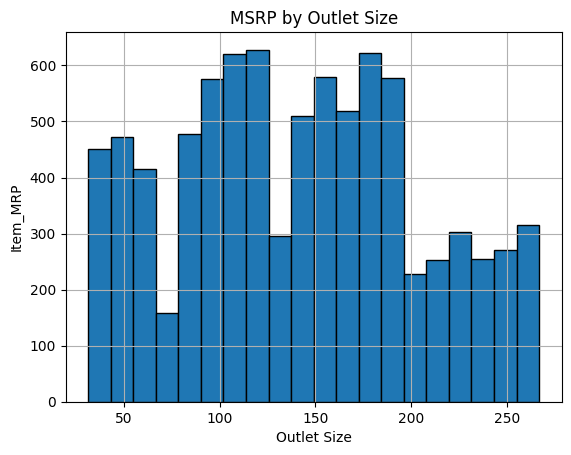

In [ ]:
ax = product_df['Item_MRP'].hist(bins = 20, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 0)
ax.ticklabel_format(style='plain')
ax.set_title('MSRP by Outlet Size')
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Item_MRP') 

Boxplot to view statistical summaries of various features in your dataset.

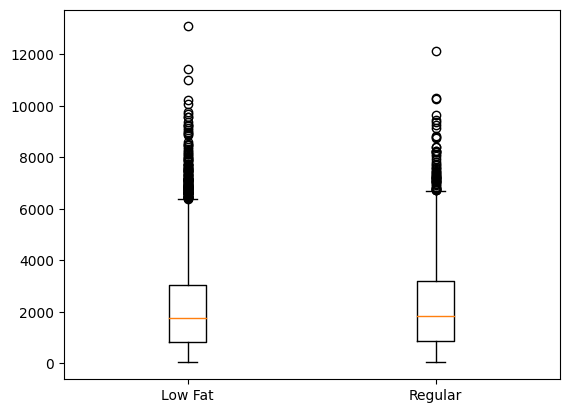

In [ ]:
lf =  product_df.loc[product_df['Item_Fat_Content']=='Low Fat','Item_Outlet_Sales']
rg =  product_df.loc[product_df['Item_Fat_Content']=='Regular','Item_Outlet_Sales']
fig, ax = plt.subplots()
ax.boxplot([lf,rg], labels=['Low Fat', 'Regular']);


Heatmap of the correlation between features

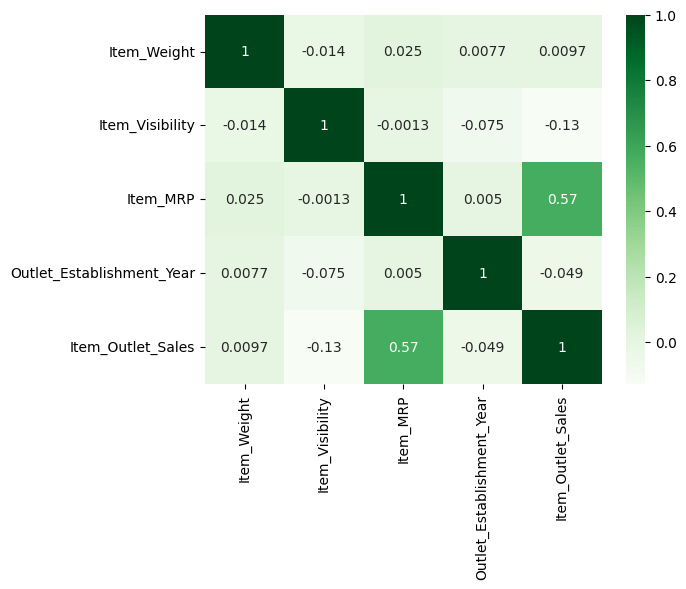

In [ ]:
corr= product_df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True) ;

## Explanatory Data Analysis

Matplot "Item Visibility" vs "Item Outlet Sales"

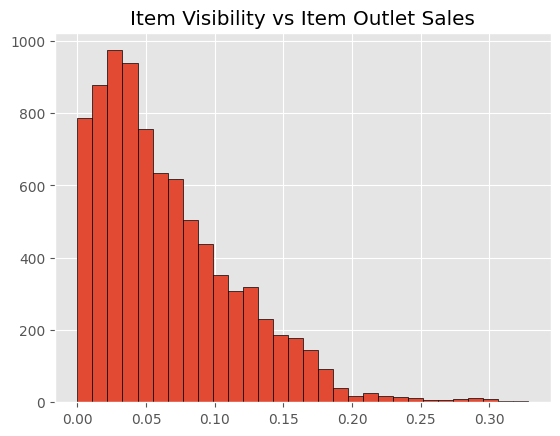

In [ ]:
with plt.style.context('ggplot'):
    # any plots created in this block will use the style
    ax = product_df['Item_Visibility'].hist(bins = 30, edgecolor='black')
    ax.tick_params(axis='x', rotation = 0)
    ax.ticklabel_format(style='plain')
    ax.set_title('Item Visibility vs Item Outlet Sales')

Scatterplot of Outlet Sales vs Item Visability by Fat Content

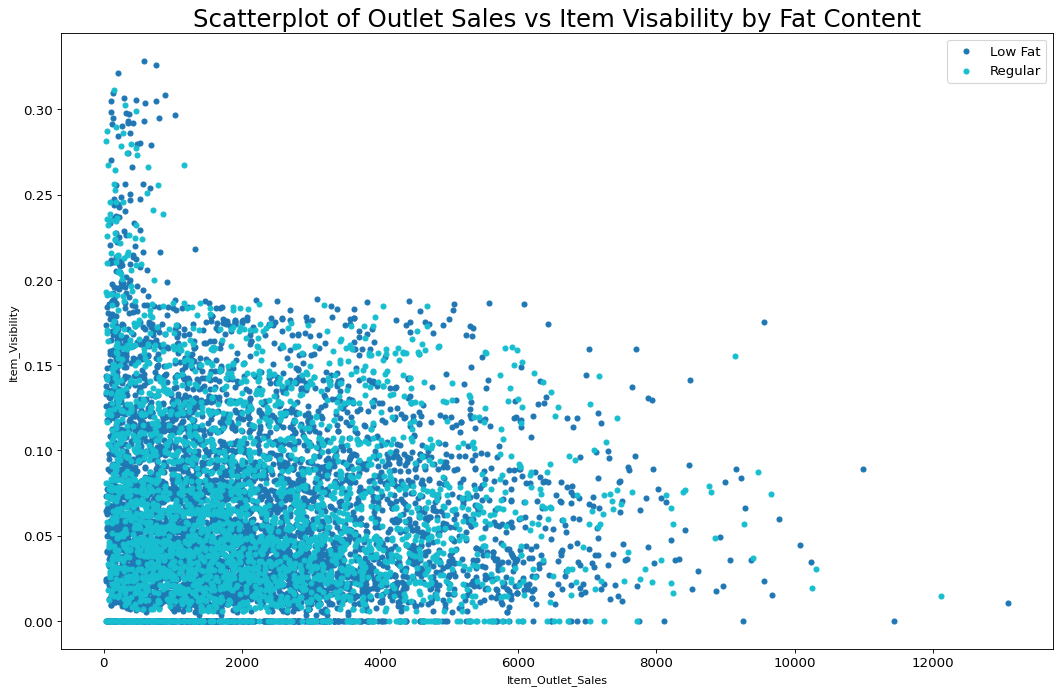

In [ ]:
pdf = product_df
categories = np.unique(pdf['Item_Fat_Content'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, Item_Fat_Content in enumerate(categories):
    plt.scatter('Item_Outlet_Sales', 'Item_Visibility', 
                data=pdf.loc[pdf.Item_Fat_Content==Item_Fat_Content, :], 
                s=20, c=colors[i], label=str(Item_Fat_Content))

# Decorations
plt.gca().set(xlabel='Item_Outlet_Sales', ylabel='Item_Visibility')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Outlet Sales vs Item Visability by Fat Content", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

#Part 5: Machine Learning

**For Part 5, you will go back to your original, uncleaned, sales prediction dataset with the goal of preventing data leakage.**

- Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split).
- Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.
- Perform a train test split.
- Create a preprocessing object to prepare the dataset for Machine Learning.
- Make sure your imputation of missing values occurs after the train test split using SimpleImputer.

#Import Data

In [ ]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Seaborn
import seaborn as sns
# Matplotlib
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

# Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

# Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Ensemble Trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

# Set global scikit-learn configuration 
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram')

#File
filename = ('/content/drive/MyDrive/Homework Stuff/sales_predictions.xlsx')

#Reload Data

In [ ]:
# Display head of Data
df = pd.read_excel(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Identify each feature as ordinal, numerical, nominal, or pass through

- ordinal features = none
- numeric features = ['Item_Weight', 'Item_Visibility', 'Item_MRP]
- nominal features = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type']
- date/time features = ['Outlet_Establishment_Year']
- pass through = none


#Clean and Refine Data

- Are there any duplicates?

In [ ]:
# Show duplicates in data set
df.duplicated().sum()

0

- No duplicates are needed to drop

- Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

In [ ]:
# Replace LF to 0, low fat to 0, Low Fat to 0, Regular to 1, reg to 1 in Item Fat Content column
# Replace LF to Low Fat, low fat to Low Fat, reg to Regular in Item Fat Content column
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)

In [ ]:
# Check value counts 
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# 'Outlet_Establishment_Year' is a date/time and will be included with categorical features
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype("object")

In [ ]:
data_types = df.dtypes
object_data_types = data_types[(data_types == "object")]
object_data_types

Item_Identifier              object
Item_Fat_Content             object
Item_Type                    object
Outlet_Identifier            object
Outlet_Establishment_Year    object
Outlet_Size                  object
Outlet_Location_Type         object
Outlet_Type                  object
dtype: object

In [ ]:
# index of object data types
object_data_types.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
# Display unique data in object columns
for column in object_data_types.index:
    print(column)
    print(df[column].unique())
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content
['Low Fat' 'Regular']


Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Establishment_Year
[1999 2009 1998 1987 1985 2002 2007 1997 2004]


Outlet_Size
['Medium' nan 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




##Explore Data set for missing values

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df[['Item_Weight', 'Outlet_Size']].dtypes

Item_Weight    float64
Outlet_Size     object
dtype: object

- There are missing values for Item Weight and Outlet Size.
  - I will use 'Median imputer' for 'Item Weight' since this is numerical.
  - I will use 'Most Frequent imputer' for 'Outlet Size' since this is nominal categorical.

###**Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.**

In [ ]:
#Separate Data
X = df.drop(columns = ['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [ ]:
# Display Data head
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [ ]:
y[0:5]

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

**Perform a train test split.**

In [ ]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6392 non-null   object 
 1   Item_Weight                5285 non-null   float64
 2   Item_Fat_Content           6392 non-null   object 
 3   Item_Visibility            6392 non-null   float64
 4   Item_Type                  6392 non-null   object 
 5   Item_MRP                   6392 non-null   float64
 6   Outlet_Identifier          6392 non-null   object 
 7   Outlet_Establishment_Year  6392 non-null   object 
 8   Outlet_Size                4580 non-null   object 
 9   Outlet_Location_Type       6392 non-null   object 
 10  Outlet_Type                6392 non-null   object 
dtypes: float64(3), object(8)
memory usage: 599.2+ KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2131 entries, 7503 to 1784
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            2131 non-null   object 
 1   Item_Weight                1775 non-null   float64
 2   Item_Fat_Content           2131 non-null   object 
 3   Item_Visibility            2131 non-null   float64
 4   Item_Type                  2131 non-null   object 
 5   Item_MRP                   2131 non-null   float64
 6   Outlet_Identifier          2131 non-null   object 
 7   Outlet_Establishment_Year  2131 non-null   object 
 8   Outlet_Size                1533 non-null   object 
 9   Outlet_Location_Type       2131 non-null   object 
 10  Outlet_Type                2131 non-null   object 
dtypes: float64(3), object(8)
memory usage: 199.8+ KB


In [ ]:
len(X_train)

6392

In [ ]:
len(X_test)

2131

In [ ]:
len(y_train)

6392

In [ ]:
len(y_test)

2131

##Prepare Data

- **Create a preprocessing object to prepare the dataset for Machine Learning.**

In [ ]:
# Instantiate the categorical and numeric column selectors to select appropriate columns
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
# Instantiate the Standard Scaler and the One hot encoder
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

##Instantiate Pipelines

In [ ]:
# Numeric pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

##Instantiate Column Transformer

In [ ]:
# Make tuples for preprocessing the categorical and numeric columns
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)


# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough', verbose_feature_names_out=False)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3db684ec20>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3db684f640>)],
                  verbose_feature_names_out=False)

##Fit and Transform our data

In [ ]:
#Fit on Train data
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3db684ec20>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3db684f640>)],
                  verbose_feature_names_out=False)

In [ ]:
# Transform Train and Test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Check X_train_processed
X_train_processed

array([[ 0.82748547, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56664432, -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12102782,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.12389588, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.77599877, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82748547, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

**Make sure your imputation of missing values occurs after the train test split using Simple Imputer.**

**Examine Our Data**

In [ ]:
#Check for missing values and that data is scaled and one-hot encoded#print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
print(X_train_processed)
X_train_processed.shape

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 50)


[[ 0.82748547 -0.71277507  1.82810922 ...  0.          1.
   0.        ]
 [ 0.56664432 -1.29105225  0.60336888 ...  0.          1.
   0.        ]
 [-0.12102782  1.81331864  0.24454056 ...  1.          0.
   0.        ]
 ...
 [ 1.12389588 -0.92052713  1.52302674 ...  1.          0.
   0.        ]
 [ 1.77599877 -0.2277552  -0.38377708 ...  1.          0.
   0.        ]
 [ 0.82748547 -0.95867683 -0.73836105 ...  1.          0.
   0.        ]]


(6392, 50)

## Convert Preprocessed Array to Dataframe

In [ ]:
# Create dataframes from the processed arrays
# First get column names
cols = preprocessor.get_feature_names_out()

In [ ]:
X_train_processed_df = pd.DataFrame(X_train_processed, 
                          columns = cols,
                          index = X_train.index)

X_test_processed_df = pd.DataFrame(X_test_processed, 
                         columns = cols,
                         index = X_test.index)

In [ ]:
# print array
cols

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishme

In [ ]:
#View the X_train transformation
X_train_processed_df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,...,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00
mean,-0.00,-0.00,0.00,0.65,0.35,0.07,0.03,0.01,0.08,0.08,...,0.11,0.61,0.28,0.27,0.33,0.40,0.12,0.65,0.11,0.11
std,1.00,1.00,1.00,0.48,0.48,0.26,0.16,0.11,0.26,0.27,...,0.31,0.49,0.45,0.45,0.47,0.49,0.33,0.48,0.31,0.32
min,-1.97,-1.29,-1.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.80,-0.76,-0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.05,-0.23,0.03,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.77,0.56,0.72,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00
max,2.01,5.13,1.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
#View the X_test transformations
X_test_processed_df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,...,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.0
mean,-0.04,0.01,-0.06,0.65,0.35,0.08,0.04,0.01,0.08,0.08,...,0.11,0.60,0.28,0.30,0.32,0.38,0.13,0.66,0.11,0.1
std,1.01,1.04,0.98,0.48,0.48,0.27,0.19,0.11,0.27,0.27,...,0.32,0.49,0.45,0.46,0.47,0.49,0.34,0.47,0.31,0.3
min,-1.96,-1.29,-1.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,-0.88,-0.76,-0.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
50%,-0.05,-0.24,-0.15,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0
75%,0.74,0.56,0.64,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.0
max,2.01,4.79,1.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0


**- It is recommended to drop the 'Item_Identifier' column due to high cardinality, (1559 is a high number of unique labels or classes). High cardinality will create a very sparse dataset when it is One Hot Encoded, which can negatively impact the models' metrics, and greatly increase processing times.**

In [ ]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
df = df.drop(columns=['Item_Identifier'])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#**1. Your first task is to build a linear regression model to predict sales.**

**- Build a linear regression model.**

**- Evaluate the performance of your model based on r^2.**

**- Evaluate the performance of your model based on rmse.** 

In [ ]:
# Create a function for Metrics
def eval_regression(y_true, y_pred, name='model'):
  """Takes true targets and predictions from a regression model and prints
  MAE, MSE, RMSE, AND R2 scores
  Set 'name' to name of model and 'train' or 'test' as appropriate"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

##Baseline Model

In [ ]:
# Create an instance of the model
dummy = DummyRegressor(strategy='mean')

# Create a model pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)

# Fit the model
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3db684ec20>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3db684f640>)],
                                   verbose_feature_names_out=False)),
                ('dummyregressor', DummyRegressor())])

## Baseline Metrics

In [ ]:
# display precition for X_train
dummy_pipe.predict(X_train)

array([2209.9793572, 2209.9793572, 2209.9793572, ..., 2209.9793572,
       2209.9793572, 2209.9793572])

In [ ]:
# Display model performance metrics using a function
dummy_train_preds = dummy_pipe.predict(X_train)
dummy_test_preds = dummy_pipe.predict(X_test)

eval_regression(y_train, dummy_train_preds, name='Baseline Regression Train Scores')
eval_regression(y_test, dummy_test_preds, name='Baseline Regression Test Scores')

Baseline Regression Train Scores Scores
MAE: 1,360.2184 
MSE: 2,959,455.7045 
RMSE: 1,720.3069 
R2: 0.0000

Baseline Regression Test Scores Scores
MAE: 1,326.1210 
MSE: 2,772,144.4627 
RMSE: 1,664.9758 
R2: -0.0048



## Linear Regression Model

In [ ]:
# Instantiate LinearRegression
lin_reg = LinearRegression()
## Create a model pipeline
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)
# fit
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3db684ec20>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3db684f640>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [ ]:
# Display model performance metrics using a function

lin_reg_train_preds = lin_reg_pipe.predict(X_train)
lin_reg_test_preds = lin_reg_pipe.predict(X_test)

eval_regression(y_train, lin_reg_train_preds, name='Linear Regression Train')
eval_regression(y_test, lin_reg_test_preds, name='Linear Regression Test ')

Linear Regression Train Scores
MAE: 847.3037 
MSE: 1,297,573.5960 
RMSE: 1,139.1109 
R2: 0.5615

Linear Regression Test  Scores
MAE: 804.2645 
MSE: 1,194,403.5311 
RMSE: 1,092.8877 
R2: 0.5671



##**2. Your second task is to build a regression tree model to predict sales.**

- Build a simple regression tree model.

- Compare the performance of your model based on r^2.

- Compare the performance of your model based on rmse.

In [ ]:
# Create an instance of the Decision Tree model
dec_tree = DecisionTreeRegressor(random_state=42)

## Create a model pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

## Fit the model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3db684ec20>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3db684f640>)],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

## Tune Model

In [ ]:
# options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

- Our default value for "max_depth" is None. The model above is not limited. 

In [ ]:
# Check depth of default tree
dec_tree.get_depth()

44

In [ ]:
# How many leaf nodes?
dec_tree.get_n_leaves()

6261

Try a few options to see how changing this parameter affects our model.

In [ ]:
# go to extreme and set our max depth to 2
dec_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree_2.fit(X_train_processed, y_train)
train_2_score = dec_tree_2.score(X_train_processed, y_train)
test_2_score = dec_tree_2.score(X_test_processed, y_test)
print(train_2_score)
print(test_2_score)

0.43164096170474664
0.4337775044707167


Scores on both the training and test sets are much lower. With a max depth of 2, our model is underfit.

Try something in between 2 and 44. What are the results with a max depth of 20?

In [ ]:
dec_tree_20 = DecisionTreeRegressor(max_depth = 20, random_state = 42)
dec_tree_20.fit(X_train_processed, y_train)
train_20_score = dec_tree_20.score(X_train_processed, y_train)
test_20_score = dec_tree_20.score(X_test_processed, y_test)
print(train_20_score)
print(test_20_score)

0.9364852009697164
0.20142838134371577


Outcome: **The training set is much higher than the test set.**

In [ ]:
depths = range(2,45)
scores = pd.DataFrame(index=depths, columns=['Train', 'Test'])

for depth in depths:
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
  dec_tree.fit(X_train_processed, y_train)
  scores.loc[depth, 'Train'] = dec_tree.score(X_train_processed, y_train)
  scores.loc[depth, 'Test'] = dec_tree.score(X_test_processed, y_test)

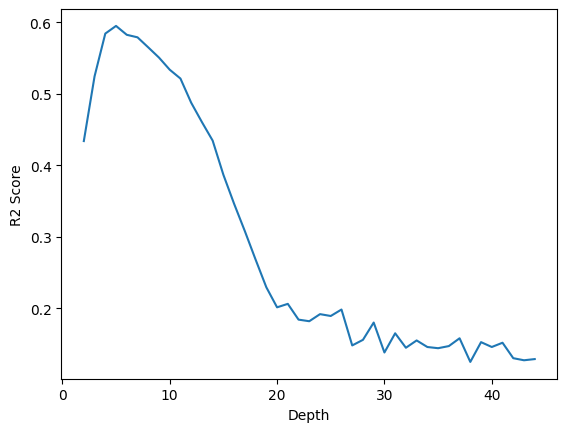

In [ ]:
# Visualize which max_depth leads to the highest r2 score
plt.plot(depths, scores['Test'])
plt.xlabel('Depth')
plt.ylabel('R2 Score');

In [ ]:
#Display head of results
scores.sort_values(by='Test', ascending=False).head()

,Train,Test
5,0.603933,0.594709
4,0.582625,0.584005
6,0.615153,0.582307
7,0.626841,0.578772
8,0.643849,0.564725


- Max Depth of 5 is our highest test score.

In [ ]:
# Set max depth to 5
best_dec_tree = DecisionTreeRegressor(max_depth = 5, random_state = 42)
best_dec_tree.fit(X_train_processed, y_train)
best_train_score = best_dec_tree.score(X_train_processed, y_train)
best_test_score = best_dec_tree.score(X_test_processed, y_test)
print(f'Best Decision Tree Train Score: {best_train_score}')
print(f'Best Decision Tree Test Score: {best_test_score}')

Best Decision Tree Train Score: 0.603933236086491
Best Decision Tree Test Score: 0.5947092601209935


##Tuned Metrics

In [ ]:
# Display model performance metrics using a function

dec_train_predict = best_dec_tree.predict(X_train_processed)
dec_test_predict = best_dec_tree.predict(X_test_processed)

eval_regression(y_train, dec_train_predict, name='Tuned Decision Tree Train')
eval_regression(y_test,dec_test_predict, name='Tuned Decision Tree Test')

Tuned Decision Tree Train Scores
MAE: 762.6399 
MSE: 1,172,142.0438 
RMSE: 1,082.6551 
R2: 0.6039

Tuned Decision Tree Test Scores
MAE: 738.3556 
MSE: 1,118,187.9463 
RMSE: 1,057.4441 
R2: 0.5947



##**3. You now have tried 2 different models on your data set. You need to determine which model to implement.**

- Overall, which model do you recommend?

- Justify your recommendation.

Linear Regression Test  Scores

- MAE: 803.9572 
- MSE: 1,194,317.0807 
- RMSE: 1,092.8482 
- R2: 0.5671


Tuned Decision Tree Test Scores

- MAE: 738.3556 
- MSE: 1,118,187.9463 
- RMSE: 1,057.4441 
- R2: 0.5947

## Display Percentage Error

In [ ]:
#Obtaining the error percentage for Decision Tree Model
y_pred = best_dec_tree.predict(X_test_processed)
mae = mean_absolute_error(y_test, y_pred)
per_error = mae / df['Item_Outlet_Sales'].mean() * 100
print(f'Decision Tree Percentage Error: {per_error:.2f}%')

Decision Tree Percentage Error: 33.85%


In [ ]:
# Calculate percentage error on Linear Regression Model
mae = mean_absolute_error(y_test, lin_reg_test_preds)
per_error = mae / df['Item_Outlet_Sales'].mean() * 100

print(f'Linear Regression Percentage Error: {per_error:.2f}%')

Linear Regression Percentage Error: 36.87%


#Final Evaluations and Recommendations

Model Best Recommended: Decision Tree

- We have a lower error percentage on Decision Tree vs Linear Regression.

- Decision Tree had the lowest MAE.  This means our model was only off on it's predictions by 738.36.

- The mean Item Outlet Sales was 2181.39. We can now understand we have an error percentage of 33.85%.